# [Entregável 3](https://docs.google.com/document/d/1CQFp25sCyrXsWO8Qj9HqXVk_TmAF7tNLstLsHy2sSzs/edit)

**Descrição das features**  
- employee_id: ID único do funcionário;  
- department: departamento do funcionário;  
- region: região de emprego (não ordenada);  
- education: nível educacional do funcionário;  
- gender: gênero do funcionário;  
- recruitment_channel: canal de recrutamento para o funcionário;  
- no_ of_ trainings:  número de treinamentos completados em anos passados, sejam em soft skills, technical skills, etc;  
- age: idade do funcionário;  
- previous_ year_ rating: avaliação do funcionário para o ano anterior;  
- length_ of_ service: duração do serviço em anos;  
- awards_ won?: se ganhou algum prêmio em anos anteriores, recebe 1, do contrário 0;  
- avg_ training_ score: pontuação média nas avaliações de treinamento atuais;
- is_promoted: (Target) recomendado ou não para promoção.  

## Setup

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('dataset3.psv', sep = '|')

## a) Utilize diferentes técnicas aprendidas para realizar a limpeza do dataset.

Vamos olhar o dataset para ter uma noção de como estão os dados.

In [70]:
# Amostra das primeiras linhas e algumas colunas
df.head()
# Nenhuma anomalia detectada

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,73.0,0.0


In [71]:
# Informações importantes
df.info()
# 1 anomalia detectada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54809 entries, 0 to 54808
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54809 non-null  object 
 1   department            54809 non-null  object 
 2   region                54809 non-null  object 
 3   education             52400 non-null  object 
 4   gender                54809 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       49962 non-null  float64
 7   age                   54808 non-null  float64
 8   previous_year_rating  50683 non-null  float64
 9   length_of_service     54807 non-null  float64
 10  awards_won?           54807 non-null  float64
 11  avg_training_score    47349 non-null  float64
 12  is_promoted           54807 non-null  float64
dtypes: float64(7), object(6)
memory usage: 5.4+ MB


A coluna employee_id tem um espaço antes do nome, vamos renomear.

In [72]:
df.rename(columns = {' employee_id':'employee_id'}, inplace = True)

In [73]:
# Contagem de valores e ao mesmo tempo veremos os tipos de valores únicos em cada feature
for i in df:
    print(df[i].value_counts())
# 7 anomalias detectadas

65438    1
65079    1
14725    1
6955     1
15415    1
        ..
67843    1
40556    1
4926     1
73662    1
32763    1
Name: employee_id, Length: 54809, dtype: int64
Sales & Marketing     16840
Operations            11348
Technology             7138
Procurement            7138
Analytics              5352
Finance                2536
HR                     2418
Legal                  1014
R&D                     999
quem trouxe quenga       25
2.0                       1
Name: department, dtype: int64
region_2                12343
region_22                6428
region_7                 4843
region_15                2808
region_13                2648
region_26                2260
region_31                1935
region_4                 1703
region_27                1659
region_16                1465
region_28                1318
region_11                1315
region_23                1175
region_29                 994
region_32                 945
region_19                 874
region_20    

Percebe-se que há algumas entradas incoerentes. Vamos eliminar as linhas que contêm elas, pois são dados em pequena quantidade provavelmente inseridos como piada, o que torna o restante dos dados daquela linha duvidoso, até mesmo a feature target dessas linhas pode estar incorreta.  
Por exemplo, na feature gender, as entradas "eu sou homem hetero homossexual!" poderiam ser inferidas como homem, mas optarei por deletar a linha pelo motivo supracitado.  
**Dados incoerentes:**
- department: quem trouxe quenga (25)
- region: casa da lu na suecia (4)
- gender: eu sou homem hetero homossexual! (224)
- age: -32 (3)
- age: 123456 (106)

In [74]:
df = df[df["department"] != "quem trouxe quenga"]
df = df[df["region"] != "casa da lu na suecia"]
df = df[df["gender"] != "eu sou homem hetero homossexual!"]
df = df[df["age"] != -32]
df = df[df["age"] != 123456]

Percebe-se que a feature gender têm m, f, MALE e fEMALE. Vamos padronizar.

In [75]:
df.loc[df['gender'] == 'fEMALE', 'gender'] = 'f'
df.loc[df['gender'] == 'MALE', 'gender'] = 'm'
df['gender'].value_counts()

m    38169
f    16277
2        1
Name: gender, dtype: int64

In [76]:
# Buscando se algum ID se repete, pois seria incoerente
anomalias = df['employee_id'].value_counts().loc[df['employee_id'].value_counts() != 1]
anomalias.sum()
# Nenhuma anomalia detectada

0

In [77]:
# Buscando casos em que os anos de serviço são maiores que a idade, pois seria incoerente
anomalias = df.loc[df['age'] < df['length_of_service']]
anomalias['employee_id'].value_counts().sum()
# Nenhuma anomalia detectada

0

Vamos remover as linhas que têm valores nulos na feature target.

In [78]:
df.dropna(subset=['is_promoted'], inplace=True)

In [79]:
# Contando valores nulos
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        1
no_of_trainings         4820
age                        0
previous_year_rating    4071
length_of_service          0
awards_won?                0
avg_training_score      7430
is_promoted                0
dtype: int64

Para os demais valores nulos, vamos adotar diferentes estratégias.

In [80]:
# Para recruitment_channel só há 1 valor nulo, então vamos deletar a linha
df.dropna(subset=['recruitment_channel'], inplace=True)

# Para education, colocamos o mais frequente
df['education'].fillna(df['education'].mode().iloc[0], inplace=True)

# Para as features numéricas, colocamos a média
df['avg_training_score'].fillna((df['avg_training_score'].mean()), inplace=True)
df['no_of_trainings'].fillna(int(df['no_of_trainings'].mean()), inplace=True)
df['previous_year_rating'].fillna(int(df['previous_year_rating'].mean()), inplace=True)

Por fim, vamos deletar a coluna employee_id, pois ela não deve influenciar na feature target.

In [81]:
df.drop(columns='employee_id', inplace=True)

## b) Realize uma breve análise do conjunto de dados. Não é necessário fazer algo muito detalhado.

In [82]:
# Descrição geral do dataset
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54444.000000,54444.000000,54444.000000,54444.000000,54444.000000,54444.000000,54444.000000
mean,1.234167,34.817354,3.305543,5.869848,0.022684,63.504669,0.085299
std,0.590280,7.648239,1.215908,4.261194,0.148895,12.543062,0.279328
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,52.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,63.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,72.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


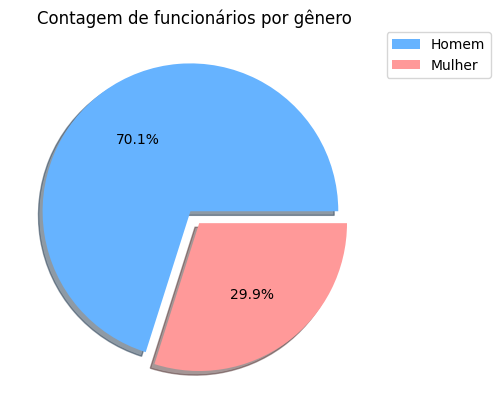

In [83]:
# Contagem de funcionários por gênero
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
data = df["gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Contagem de funcionários por gênero', ylabel='', labeldistance=None, labels=["Homem", "Mulher"])
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

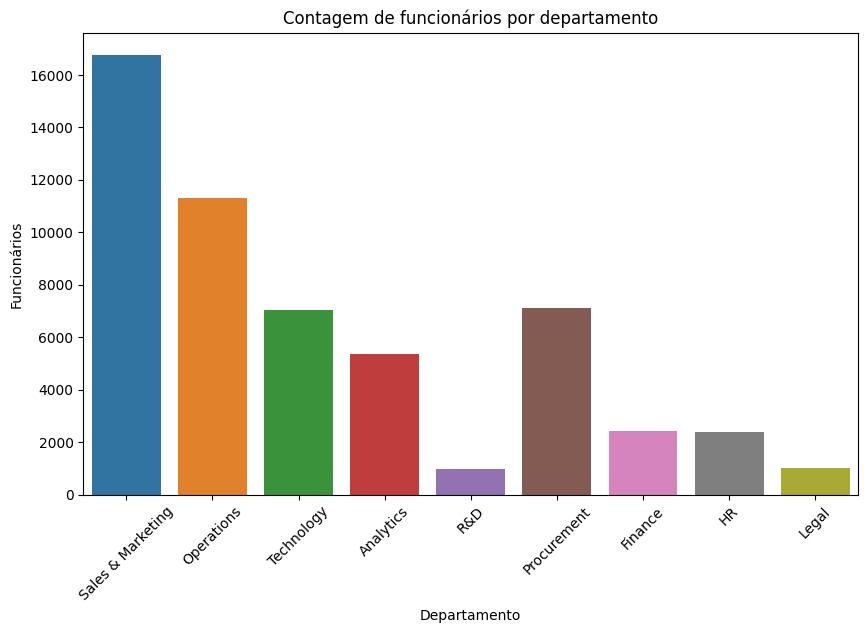

In [84]:
# Contagem de funcionários por departamento
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=df)
plt.title('Contagem de funcionários por departamento')
plt.xticks(rotation=45)
plt.ylabel('Funcionários')
plt.xlabel('Departamento')
plt.show()

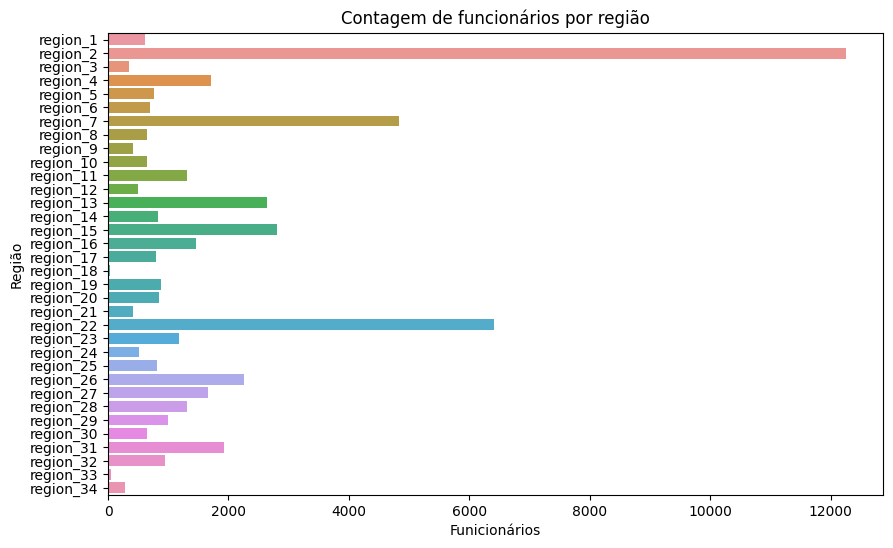

In [85]:
# Contagem de funcionários por região
plt.figure(figsize=(10, 6))
sns.countplot(y='region', orient="h", data=df, order=['region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 'region_19', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_30', 'region_31', 'region_32', 'region_33', 'region_34'])
plt.title('Contagem de funcionários por região')
plt.ylabel('Região')
plt.xlabel('Funicionários')
plt.show()

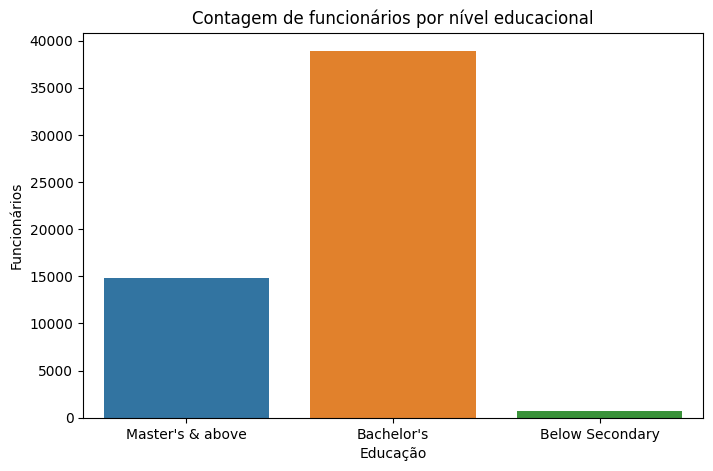

In [86]:
# Contagem de funcionários por nível educacional
plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=df)
plt.title('Contagem de funcionários por nível educacional')
plt.xlabel('Educação')
plt.ylabel('Funcionários')
plt.show()

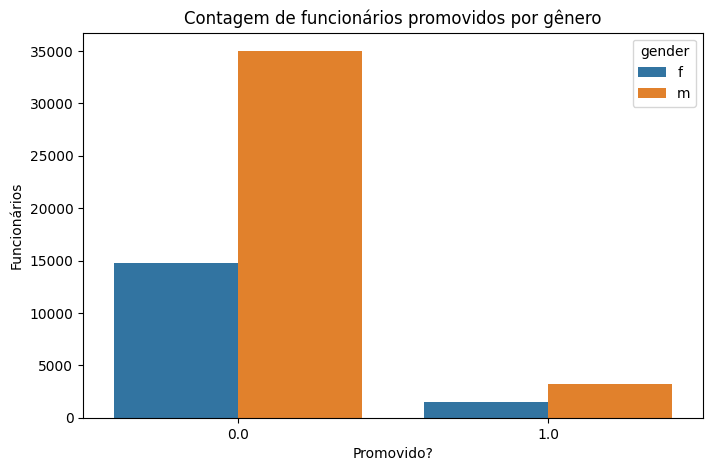

In [87]:
# Contagem de funcionários promovidos por gênero
plt.figure(figsize=(8, 5))
sns.countplot(x='is_promoted', hue='gender', data=df)
plt.title('Contagem de funcionários promovidos por gênero')
plt.xlabel('Promovido?')
plt.ylabel('Funcionários')
plt.show()

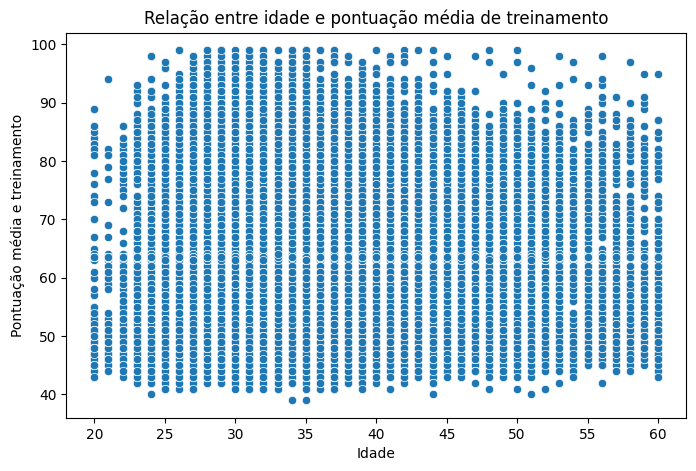

In [88]:
# Relação entre idade e pontuação média de treinamento
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='avg_training_score', data=df)
plt.title('Relação entre idade e pontuação média de treinamento')
plt.xlabel('Idade')
plt.ylabel('Pontuação média e treinamento')
plt.show()

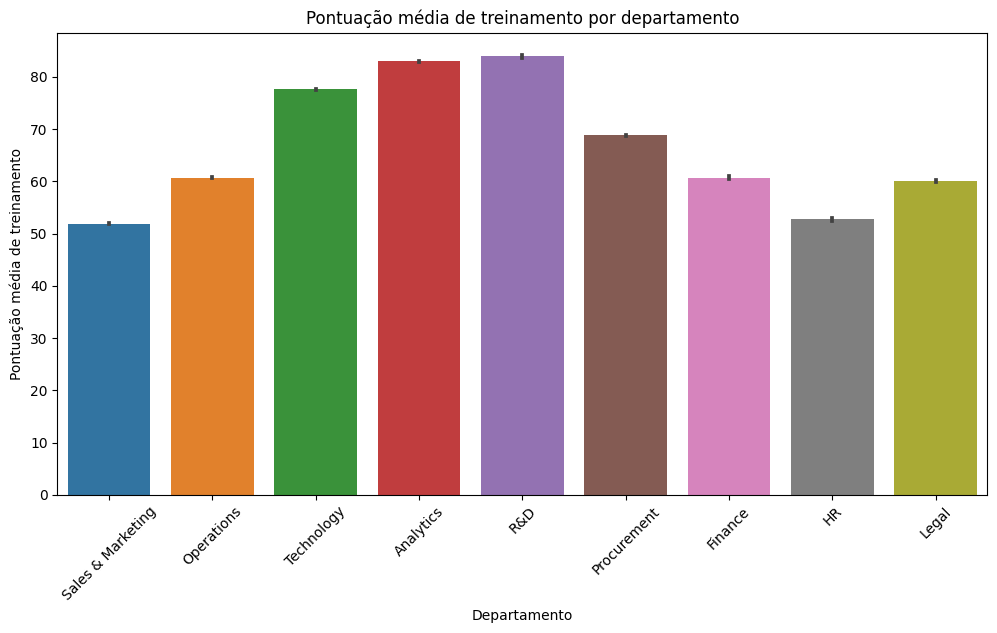

In [89]:
# Média de pontuação de treinamento por departamento
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='avg_training_score', data=df)
plt.title('Pontuação média de treinamento por departamento')
plt.xticks(rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Pontuação média de treinamento')
plt.show()

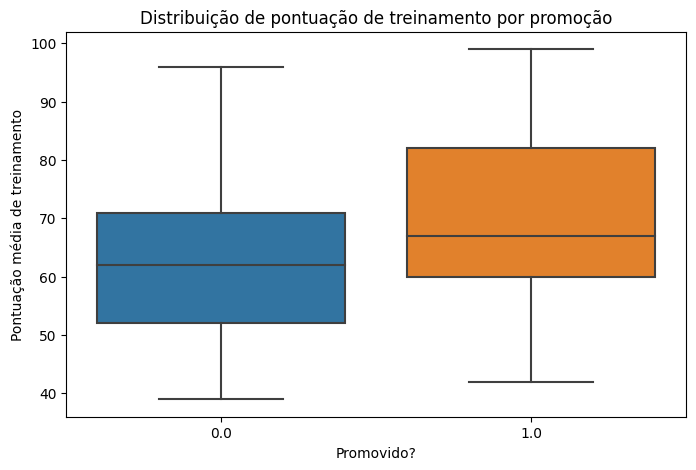

In [90]:
# Distribuição de pontuação de treinamento por promoção
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_promoted', y='avg_training_score', data=df)
plt.title('Distribuição de pontuação de treinamento por promoção')
plt.xlabel('Promovido?')
plt.ylabel('Pontuação média de treinamento')
plt.show()

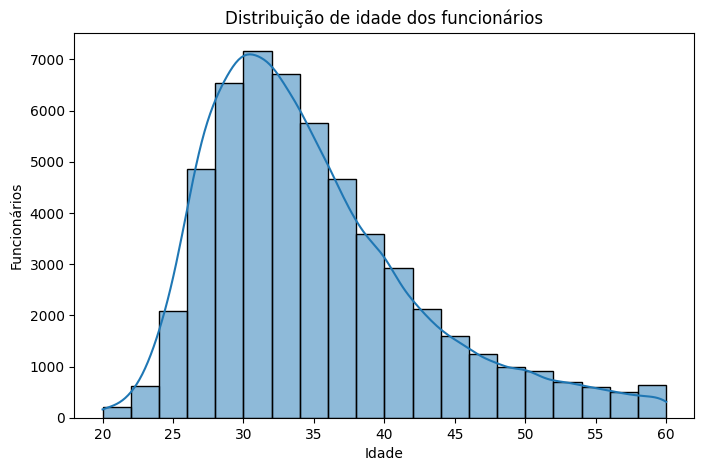

In [91]:
# Distribuição de idade dos funcionários
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribuição de idade dos funcionários')
plt.xlabel('Idade')
plt.ylabel('Funcionários')
plt.show()

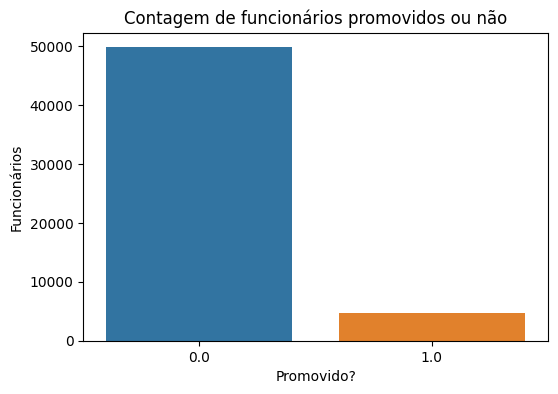

In [92]:
# Contagem de funcionários promovidos ou não
plt.figure(figsize=(6, 4))
sns.countplot(x='is_promoted', data=df)
plt.title('Contagem de funcionários promovidos ou não')
plt.xlabel('Promovido?')
plt.ylabel('Funcionários')
plt.show()

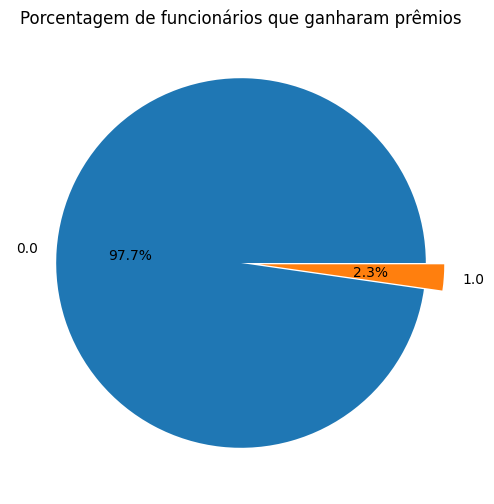

In [93]:
# Porcentagem de funcionários que ganharam prêmios
plt.figure(figsize=(6, 6))
df['awards_won?'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Porcentagem de funcionários que ganharam prêmios')
plt.ylabel('')
plt.show()

<ipython-input-94-626f26243eff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


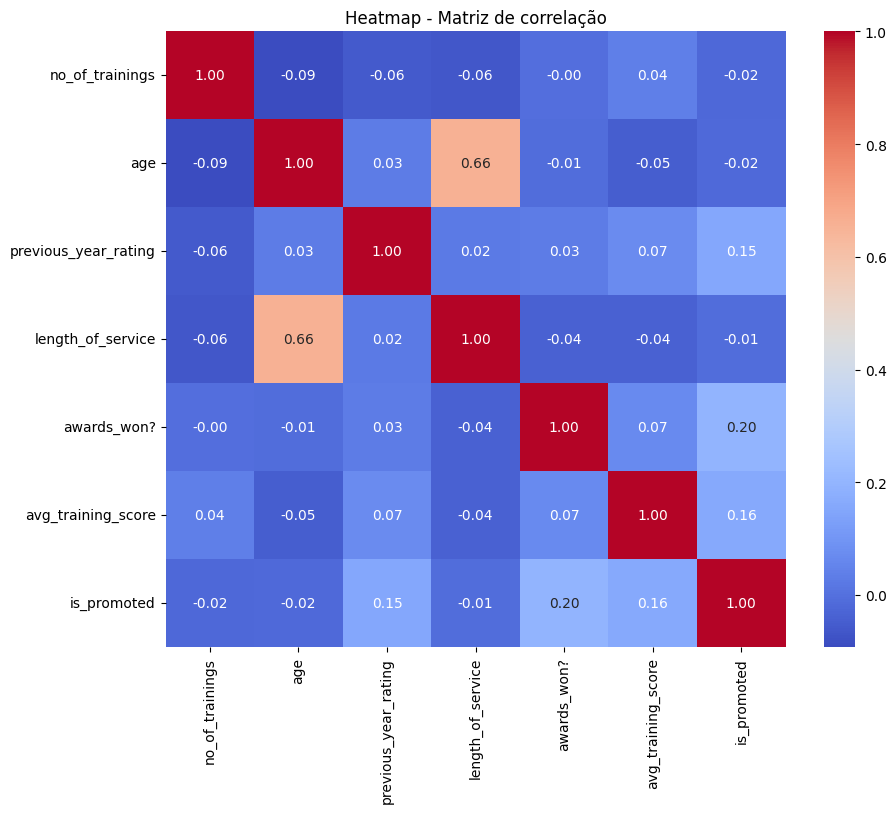

In [94]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap - Matriz de correlação')
plt.show()

No geral, vários dos dados são desbalanceados.

## c) Realize o Categorical Encoding das features catégóricas do dataset.

In [95]:
# Para as features categóricas de poucas categorias, faremos one-hot encoding
df = pd.get_dummies(df, columns=['department'], prefix='department')
df = pd.get_dummies(df, columns=['education'], prefix='education')
df = pd.get_dummies(df, columns=['gender'], prefix='gender')
df = pd.get_dummies(df, columns=['recruitment_channel'], prefix='recruitment_channel')

# Para a region faremos uma frequency encoding, pois muitas colunas seriam criadas pelo one-hot encoding
region_freq = df['region'].value_counts(normalize=True)
df['region'] = df['region'].map(region_freq)
df.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.088660,1.0,35.0,5.0,8.0,0.0,49.0,0.0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,0.117662,1.0,30.0,5.0,4.0,0.0,60.0,0.0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,0.016053,1.0,34.0,3.0,7.0,0.0,50.0,0.0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,0.021582,2.0,39.0,1.0,10.0,0.0,50.0,0.0,0,0,...,1,0,1,0,0,0,1,1,0,0
4,0.041511,1.0,45.0,3.0,2.0,0.0,73.0,0.0,0,0,...,0,1,1,0,0,0,1,1,0,0


## d) Promova a normalização das colunas com variáveis contínuas.

In [96]:
# Vamos normalizar todas as features contínuas para valores de 0 a 1
features=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']
for i in features:
    valor_min = df[features].min()
    valor_max = df[features].max()
    df[features] = (df[features] - valor_min) / (valor_max - valor_min)

## e) Divida seus dados entre treino e teste. Utilizando a biblioteca sklearn treine um modelo KNN. Determine o menor número de vizinhos (K) para o qual a acurácia do modelo para os dados de teste é a maior possível.

In [97]:
# Dividindo os dados em conjuntos de treinamento e teste

from sklearn.model_selection import train_test_split

X = df.drop(columns='is_promoted')  # Features
y = df['is_promoted']  # Target

# test_size de 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definindo uma lista de valores de K que queremos testar
valores_k = list(range(1, 31))

melhor_acuracia = 0
melhor_k = 0

# Testando diferentes valores de K
for k in valores_k:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > melhor_acuracia:
        melhor_acuracia = accuracy
        melhor_k = k

# Treinando e testando novamente com o melhor K
knn_model = KNeighborsClassifier(n_neighbors=melhor_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("A maior acurácia é", melhor_acuracia, "para", melhor_k, "vizinhos.", sep=' ')

A maior acurácia é 0.9237762879970612 para 6 vizinhos.


## f) Você percebe algum erro no modelo que acabou de treinar? Pesquise o que são Dados Desbalanceados e como isso pode afetar no desempenho de modelos de Machine Learning.

O modelo KNN pode apresentar muitos erros quando os dados estão desbalanceados, que é o caso deste dataset. Logo, faltou usar técnicas de balanceamento dos dados para balancear o número de falsos negativos e falsos positivos.

## g) Pesqueise sobre Precisão e Recall, métricas de avaliação de modelos mais adequadas para lidar com dados desbalanceados. Calcule a precisão e o recall do modelo que você treinou. O que essas métricas indicam?

In [99]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# O modelo já foi treinado e testado, vamos apenas calcular

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 0.9237762879970612
Precisão: 0.7972972972972973
Recall: 0.12854030501089325


Acurácia: classificados corretamente / total  
Precisão: verdadeiros positivos / (verdadeiros positivos + falsos positivos)  
Recall: verdadeiros positivos / (verdadeiros positivos + falsos negativos)  

Todos os 3 são desejados que sejam altos, mas geralmente isso não é tão fácil. Aumentar a precisão costuma baixar o recall e vice-versa. Escolhemos um equilíbrio de modo que os 3 parâmetros estejam aceitáveis dentro do objetivo do modelo.  
Podemos querer favorecer recall ou precisão dependento da situação, se for importante ter poucos falsos negativos ou poucos falsos positivos respectivamente.    
Como podemos ver, nosso modelo tem baixo recall devido aos dados desbalanceados, o que não é bom, pois ele gera muitos falsos negativos.

## h) Pesquise por um modelo ou por técnicas de Machine Learning capazes de minimizar o efeito de classes desbalanceadas. Tente aplicar.

Vamos aplicar a técnica SMOTE, que gera dados para as classes minoritárias de maneira razoavelmente inteligente.

In [100]:
from imblearn.over_sampling import SMOTE

# Gera amostras da classe minoritária
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinando o modelo com os novos dados
knn_model.fit(X_train_resampled, y_train_resampled)

# Realizando a previsão com os dados de teste
y_pred = knn_model.predict(X_test)

# Calculando a acurácia do modelo após a aplicação do SMOTE
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 0.7908898888786849
Precisão: 0.18873110398534126
Recall: 0.44880174291938996


Como podemos ver, obtivemos um aumento significativo de recall a custo da precisão.